# Descriptive Statistics

## Outline
### 1. Computing the mean median and variance of a dataset population
### 2. Drawing samples and Distribution of sample mean & variance 
### 3. Bootstrapping

## Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#####

from IPython.display import clear_output, display
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

In [2]:
df = pd.read_csv('2015.csv')
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


We will assume that this dataset is the **full population**. In reality it would still be a sample. Let's look at a histogram of the 'Happiness Score', the histogram is a representation of the **distribution** of the population of Happiness Scores.

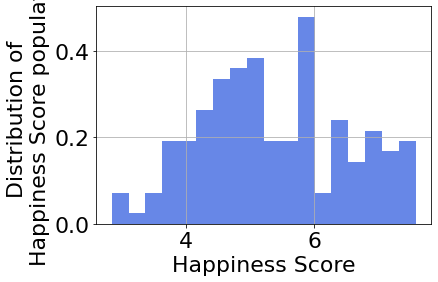

In [3]:
df['Happiness Score'].hist(bins=18, color='royalblue', alpha=0.8, density=True)
plt.xlabel('Happiness Score')
plt.ylabel('Distribution of \n Happiness Score population')
plt.show()

We can see that the population isn't normally distributed i.e. **does not follow** a perfect Gaussian or Normal distribution:

$$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$$

# $\color{red}{\text{Practice Question :}}$

Using the distribution function for a normal distribution shown above, regenerate the histogram above and add a normal distribution curve to it with mean and std.dev of the Happiness Score.

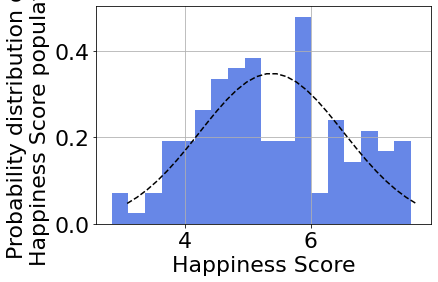

In [4]:
# Copy histogram above
df['Happiness Score'].hist(bins=18, density=True, color='royalblue',alpha=0.8)
plt.xlabel('Happiness Score')
plt.ylabel('Probability distribution of \n Happiness Score population')

#meand and stdev from df.describe()
sigma = 1.145010
mu = 5.375734
bins = np.linspace(mu-2*sigma,mu+2*sigma,30) # +/- 2-sigma should cover ~95 % of values

#Generate a normal distribution curve using bins as your x value and add it to the graph below -
X = bins
Y = (1/np.sqrt(2*3.14*sigma**2))*np.exp(-((X-mu)**2)/(2*sigma**2))
plt.plot(X,Y,"k--")

## 1) Computing the mean, median, standard deviation and variance


Mean : $${\mu}=\frac{\sum_{i=1}^N X_i}{N}$$ 

Population Std. Dev (population known): $$\sigma=\sqrt{\sum_{i=1}^N\frac{(X_i-\mu)^2}{N}}$$

Population Std. Dev (sample): $$S=\sqrt{\sum_{i=1}^N\frac{(X_i-\mu)^2}{N-1}}$$


In [5]:
N = len(df['Happiness Score'].values)

mean = np.sum( df['Happiness Score'].values ) / N 
print(mean)

df['Happiness Score'].mean()

5.375734177215189


5.375734177215189

In [6]:
df['Happiness Score'].describe()

# df['Happiness Score'].mean()

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64

# $\color{red}{\text{Practice Question :}}$

Compute the standard deviation and variance using built-in functions

In [7]:
df['Happiness Score'].std(ddof=0)

1.1413809336358134

In [8]:
#Manually calculate stdev

stdev = np.sqrt(np.sum([(Xi - mean)**2 for Xi in df['Happiness Score'].values])/(N))
print(stdev)

1.1413809336358134


Slightly different standard deviation? Because describe computes std as the corrected sample standard deviation which is unbiased

$$\sigma=\sqrt{\sum_{i=1}^{N}\frac{(X_i-\mu)^2}{N-1}}$$

In [9]:
# variance?


# median 

In [10]:
HS = np.sort(df['Happiness Score'].values)
if len(HS) %2 == 0:                                          #if even number of elements
    median = ( HS[int(len(HS)/2)-1] + HS[int(len(HS)/2)] )/2 # median is mean of middle 2 elements
else:                                                        # if odd number of elements
    median = HS[int(len(HS)/2)-1] 
    
print("my median", median)    
median = df['Happiness Score'].median()
print("median function", median)

my median 5.2325
median function 5.2325


Where do these values end up on the plot?

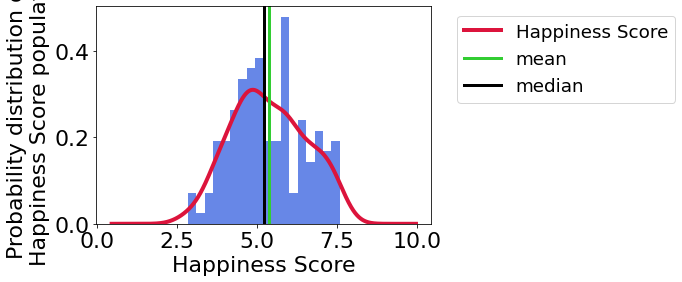

In [11]:
df['Happiness Score'].hist(bins=18,density=True,color='royalblue',alpha=0.8)
df['Happiness Score'].plot.kde(linewidth=4,color="crimson") # kernel density plot

plt.xlabel('Happiness Score')
plt.ylabel('Probability distribution of \n Happiness Score population')


plt.axvline(x = mean, lw=3,color='limegreen',label='mean')
plt.axvline(x = median, lw=3,color='black',label='median')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.show()

## 2) Sampling from a population, sample distributions & the central limit theorem

Let's go  to our Clean Energy database and load the data. info - https://dash.harvard.edu/handle/1/8364968

In [12]:
data = pd.read_csv('HCEPDB_moldata.csv') 
data.columns

Index(['Unnamed: 0', 'SMILES_str', 'stoich_str', 'mass', 'pce', 'voc', 'jsc',
       'homo', 'lumo'],
      dtype='object')

In [13]:
data.count()

Unnamed: 0    1048575
SMILES_str    1048575
stoich_str    1048575
mass          1048575
pce           1048575
voc           1048575
jsc           1048575
homo          1048575
lumo          1048575
dtype: int64

This dataset is huge! We will take a random slice and assume that our slice represents a full population (again this is actually a large sample) and look at the mass values. We are making this approximation to accelerate the calculations in the notebook.

In [14]:
population = data.sample(frac = 0.05, random_state = 3202242) 
population.count()

Unnamed: 0    52429
SMILES_str    52429
stoich_str    52429
mass          52429
pce           52429
voc           52429
jsc           52429
homo          52429
lumo          52429
dtype: int64

In [15]:
population.head()

,Unnamed: 0,SMILES_str,stoich_str,mass,pce,voc,jsc,homo,lumo
320719,857862,C1C=c2c3cc([nH]c3c3oc4ccc5c[nH]cc5c4c3c2=C1)-c...,C25H14N2O2S,406.4636,0.000000,0.000000,112.773864,-4.531726,-2.646764
1037982,307484,C1C=c2c(cc3cc4[se]c5ccsc5c4cc3c2=C1)-c1scc2[nH...,C23H13NS2Se,446.4547,1.818927,0.283990,98.573546,-4.883990,-2.909234
919521,1863166,C1cccc1-c1ccc(-c2cnc(-c3scc4ccCc34)c3nsnc23)c2...,C25H15N3OS2,437.5455,8.129472,0.524483,238.549410,-5.124483,-3.853301
179318,1270017,C1C=Cc2cc3c4cocc4c4cc(sc4c3cc12)-c1cncs1,C20H11NOS2,345.4449,2.528862,0.728692,53.410747,-5.328692,-2.979697
864745,90139,[SiH2]1C=c2c(cc3sc4c(c3c2=C1)c1ccccc1c1ccccc41...,C26H17NSSi,403.5793,5.240850,0.514985,156.622761,-5.114985,-3.465444


In [16]:
true_mean = population['mass'].mean()
true_stdev = population['mass'].std(ddof=0)
print("pop mean", true_mean, " \npop stdev", true_stdev)

pop mean 396.2912259207691  
pop stdev 58.33759776859889


<AxesSubplot: ylabel='Frequency'>

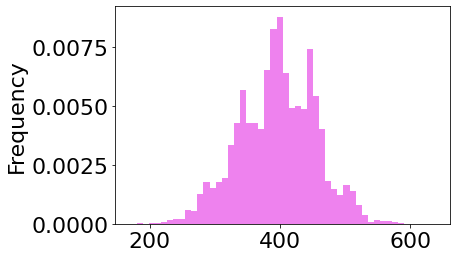

In [17]:
population['mass'].plot.hist(bins=50, color='violet', density=True)

Our goal is to **sample** from the mass values to attempt to compute the true population mean and standard deviation. Let's write a function that samples the  dataframe with an argument *n* that is the number of samples to take. We want to sample without replacement.

In [18]:
type(np.array(population['mass'].index))

numpy.ndarray

In [19]:
def draw_sample(datafr, column, n):
    subset_indices = np.random.choice(np.array(list(datafr[column].index)), size=n, replace=False)
    sample = pd.DataFrame(data=datafr[column][subset_indices].values, columns=['sample'])
    return sample

In [20]:
sample = draw_sample(population,'mass', 20)
sample

,sample
0,425.3516
1,475.5507
2,356.4038
3,497.5106
4,352.3179
5,443.6003
6,355.4018
7,295.3437
8,328.3938
9,392.5564


# $\color{red}{\text{Practice Question :}}$

Now we want to draw *M* samples of size *n* from the population and see what the mean and standard deviation are for these samples.

Create a function which calls <code>draw_sample</code> *M* times and returns the mean and standard deviation of each sample. 

Input arguments should include

* a variable called <code>sample_funct</code> this variable will be used to refer to the <code>draw_sample</code> function
* a variable for the dataframe
* a variable for the column of interest
* a variable for the number of calls *M*
* a variable for the number of data points per samples *n*

The output should include

* a list which contains the means
* a list which contains the standard deviations

Hint: your function might look like:

<code>def repeat_samples_stats(sample_funct, df, column, M, n):  
   means = []  
   stdevs = []  
   ...  
   return (means, stdevs)
</code>

then use the append method to append each mean and sd value to the end of each respective list.

In [21]:
## Enter answer for practice question here

def repeat_samples_stats(draw_sample, df, column, M, n):
    means=[]
    stdevs=[]
    for i in range(M):
        sample = draw_sample(df, column, n)
        means.append(np.mean(sample))
        stdevs.append(np.std(sample,ddof=1))
        
    return means,stdevs

Let's use our function to make 20 samples and compute 20 means and 20 standard deviations. We will extract 50 points per sample.

In [22]:
means_1, stdevs_1 = repeat_samples_stats(draw_sample, population, 'mass', 200, 50)

In [23]:
means_1[0:10]

[400.79011800000006,
 397.72340599999995,
 390.17539000000005,
 383.19042199999996,
 402.71777199999997,
 398.4201019999999,
 397.76079400000003,
 399.559396,
 396.144188,
 385.761034]

What does the distribution of the means look like - i.e. let's consider all these means as data points part of a sample or population. We will first use matplotlib

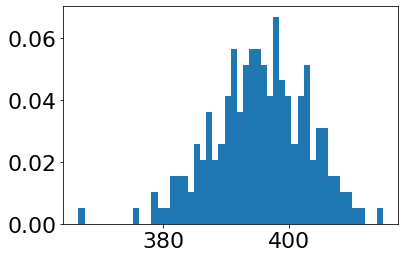

In [24]:
plt.hist(x=means_1,bins=50,density=True)
plt.show()

### Let's change the number of samples and points per sample

In [25]:
means_2, stdevs_2 = repeat_samples_stats(draw_sample, population, 'mass', 500, 1000)

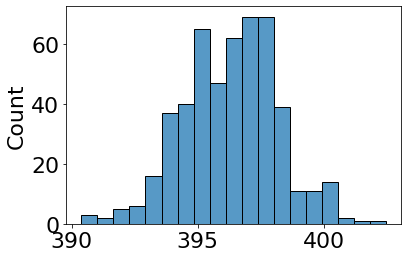

In [26]:
import seaborn as sns
sns.histplot(data=means_2)
plt.show()

In statistics and machine learning, **bootstrapping** is a resampling technique that involves repeatedly drawing samples from our source data with replacement, often to estimate a population parameter. 

By “with replacement”, we mean that the same data point may be included in our resampled dataset multiple times.

Now let's make a function with four arguments `sample_stats_funct`, `df`, `column`, `M` and `n` that takes the return values from the last function and
* converts the lists to a single dataframe
* plots two histograms of the columns (mean, sd)
* prints out the mean and sd of the columns
* prints out the standard deviation of the distribution of means

In [27]:
def describe_sample(sample_stats_funct, df, column, M, n):
    
    means, sds = sample_stats_funct(draw_sample, df, column, M, n) 
    df = pd.DataFrame(data={'means': means, 'sds': sds})
    
    df.hist(bins=100,color='mediumorchid')
    
    
    print('Mean:', np.round(df['means'].mean(),3))
    print('Std Dev:', np.round(df['sds'].mean(), 3))
    print('Mean Std Dev:', np.round(df['means'].std(), 3))
    
    return df

Mean: 396.248
Std Dev: 58.07
Mean Std Dev: 5.909


/scratch/local/12108003/ipykernel_901494/2137482426.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Std Dev:', np.round(df['sds'].mean(), 3))


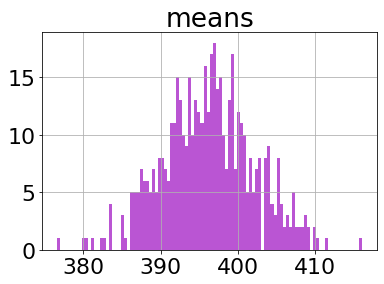

In [28]:
df_100_500 = describe_sample(repeat_samples_stats, population, 'mass', 500, 100)

N samples = 10
Mean: 396.149
Std Dev: 58.271
Mean Std Dev: 5.018
N samples = 100


/scratch/local/12108003/ipykernel_901494/2137482426.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Std Dev:', np.round(df['sds'].mean(), 3))
/scratch/local/12108003/ipykernel_901494/2887766946.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_std_samples.append(df['sds'].mean())


Mean: 397.033
Std Dev: 57.565
Mean Std Dev: 5.459
N samples = 500


/scratch/local/12108003/ipykernel_901494/2137482426.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Std Dev:', np.round(df['sds'].mean(), 3))
/scratch/local/12108003/ipykernel_901494/2887766946.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_std_samples.append(df['sds'].mean())


Mean: 396.561
Std Dev: 58.135
Mean Std Dev: 6.142
N samples = 1000


/scratch/local/12108003/ipykernel_901494/2137482426.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Std Dev:', np.round(df['sds'].mean(), 3))
/scratch/local/12108003/ipykernel_901494/2887766946.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_std_samples.append(df['sds'].mean())


Mean: 396.149
Std Dev: 58.438
Mean Std Dev: 5.896
N samples = 2000


/scratch/local/12108003/ipykernel_901494/2137482426.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Std Dev:', np.round(df['sds'].mean(), 3))
/scratch/local/12108003/ipykernel_901494/2887766946.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_std_samples.append(df['sds'].mean())


Mean: 396.15
Std Dev: 58.193
Mean Std Dev: 5.798


/scratch/local/12108003/ipykernel_901494/2137482426.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Std Dev:', np.round(df['sds'].mean(), 3))
/scratch/local/12108003/ipykernel_901494/2887766946.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_std_samples.append(df['sds'].mean())


N samples = 5000
Mean: 396.275


/scratch/local/12108003/ipykernel_901494/2137482426.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Std Dev:', np.round(df['sds'].mean(), 3))


Std Dev: 58.235
Mean Std Dev: 5.803


/scratch/local/12108003/ipykernel_901494/2887766946.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_std_samples.append(df['sds'].mean())


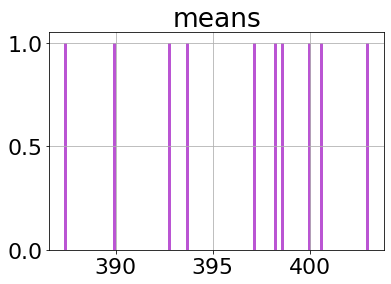

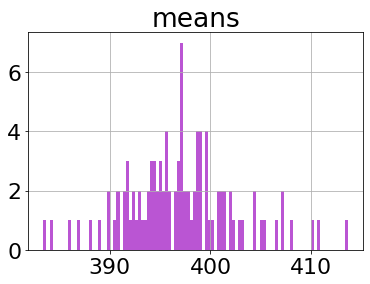

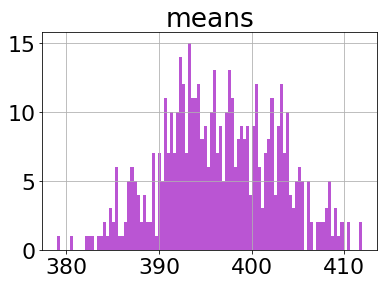

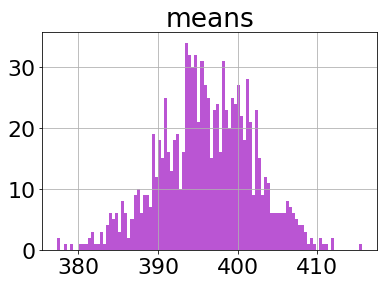

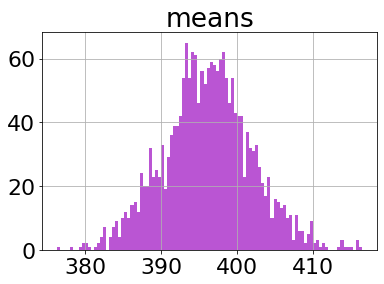

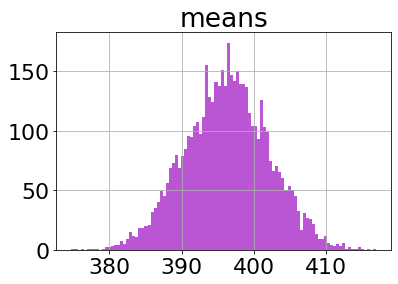

In [29]:
Nexamples = 100

# mean and std of distribution of means
mean_of_means = []
std_of_distr_means = []

# mean std of samples
mean_std_samples = []

Ns = [10,100,500,1000,2000,5000]
for Nsamples in Ns:
    print('N samples =', Nsamples)
    df = describe_sample(repeat_samples_stats, population, 'mass', Nsamples, Nexamples)
    mean_of_means.append(df['means'].mean())
    std_of_distr_means.append(df['means'].std())
    mean_std_samples.append(df['sds'].mean())
    

## Central Limit Theorem

In probability theory, the central limit theorem (CLT) establishes that, in many situations, when independent random variables are summed up, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed.

The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.

# 3. Why Bootstrapping ??

In statistics, Bootstrap Sampling is a method that involves drawing of sample data repeatedly with replacement from a data source to estimate a population parameter.

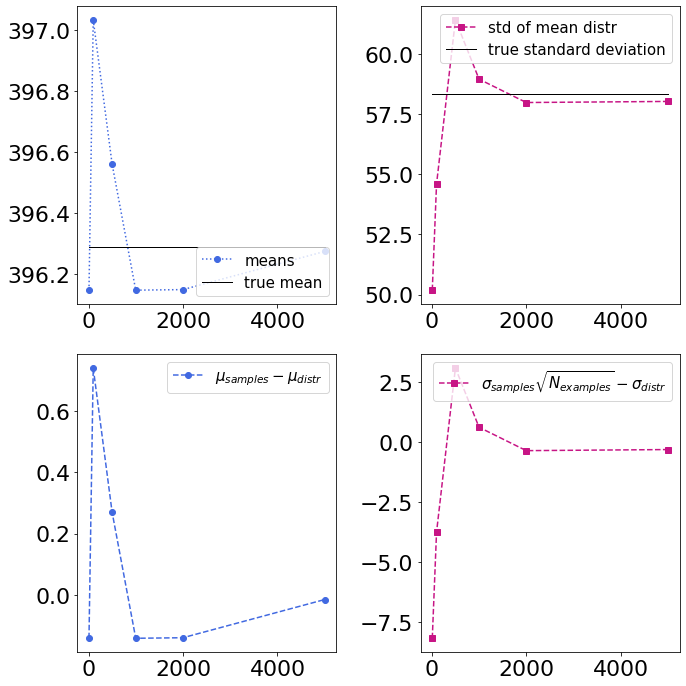

In [30]:
fig,ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].plot(Ns, mean_of_means, ':o', color="royalblue", label="means")
ax[0,0].plot(Ns, true_mean*np.ones(len(Ns)), "-k", lw=1, label="true mean")
ax[0,1].plot(Ns, np.array(std_of_distr_means)*np.sqrt(Nexamples), '--s', color="mediumvioletred", label="std of mean distr")
ax[0,1].plot(Ns, true_stdev*np.ones(len(Ns)), '-k', lw=1,  label="true standard deviation")
ax[0,0].legend(loc="lower right", fontsize=15)
ax[0,1].legend(loc="upper right", fontsize=15)
ax[1,0].plot(Ns, np.array(mean_of_means) - true_mean, '--o', color="royalblue", label="$\mu_{samples}-\mu_{distr}$")
ax[1,1].plot(Ns, np.array(std_of_distr_means)*np.sqrt(Nexamples)- true_stdev, '--s', color="mediumvioletred", label="$\sigma_{samples}\sqrt{N_{examples}}-\sigma_{distr}$")
ax[1,0].legend(loc="upper right", fontsize=15)
ax[1,1].legend(loc="upper right", fontsize=15)
fig.tight_layout()